# HW 5
#### 國立臺灣大學 工業工程所碩士班 一年級 趙上涵 R08546036

# Q1
<img src='./picture_source/HW_5_1.PNG'>

In [11]:
import pandas as pd
import numpy as np

In [239]:
def factor_analyzer(X, factor_number):
    # calculate X mean and center X
    X_mean = np.mean(X.T, axis=1)
    X_center = X - X_mean
    X_covariance = np.cov(X_center.T)
    X_variance = np.var(X_center)
    # produce eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(X_covariance)
    eigenvalues_selected = eigenvalues[:factor_number]  # keep selected eigenvalues only
    # produce eigenvalues diagonal matrix and eigenvalues diagonal matrix
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigenvalues[:factor_number])
    # produce A_transpose and A
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_transpose = eigenvectors[:, :factor_number].dot(eigenvalues_diagonal_sqrt)
    A = eigenvalues_diagonal_sqrt.dot(eigenvectors[:, :factor_number].T)
    #     print('A', A.shape)
    #     print('A_transpose', A_transpose.shape)
    # calculate Psi
    Psi = X_covariance - A_transpose.dot(A)
    #     print('Psi', Psi.shape)
    Psi_inverse = np.linalg.inv(Psi)
    #     print(Psi)
    #     print('X', X.shape)
    former = np.linalg.inv(A.dot(Psi_inverse).dot(A_transpose))
    #     factor = X.dot(Psi_inverse).dot(A_transpose).dot(former)
    factor = X.dot(Psi_inverse).dot(A_transpose).dot(former)
    # calculate communality vector
    communality_vector = X_covariance - Psi

    # print out summary
    print("========================== Output Summary ==========================\n【The loading matrix A】\n", A,
          "\n\n【Factor Matrix】\n", factor,
          "\n\n【Communality Matrix】\n", communality_vector,
          "\n\n【Uniqueness Vector】\n", Psi, "\n\n")

    # calculate contribution of each factor
    contribution_list = []
    for i, j in enumerate(eigenvalues_selected):
        varianve_total = np.sum(X_covariance)
        factor_contribution = np.around((j / varianve_total), decimals=6)
        contribution_list.append(factor_contribution)
        print('Contribution of factor', (i + 1), 'is', factor_contribution)
        
    print(np.sum(contribution_list))

    return factor

In [238]:
AutoMPG = pd.read_csv('./data/AutoMPG.csv')
factor = factor_analyzer(AutoMPG, 8)

========================== Output Summary ==========================
【The loading matrix A】
 [[-2.76283280e+00  1.53387336e+00  9.78371325e+01  3.33425074e+01
   8.49389559e+02 -1.15756714e+00 -1.14389470e+00 -4.71929042e-01]
 [-2.87773671e-01  5.18452533e-01  3.67996255e+01  1.16056631e+01
  -4.69938987e+00 -1.35513260e+00 -9.28772516e-01 -1.26213461e-01]
 [-2.72171362e-01 -1.17848575e-01 -4.90399164e+00  1.53331672e+01
  -4.02246864e-02 -1.24446457e+00 -6.95768789e-01  2.01236264e-01]
 [ 1.25637155e+00 -8.97442416e-03  3.32677758e-02  1.66452140e-01
  -2.08692538e-03 -1.75597734e-01  3.26653281e+00  2.95156162e-02]
 [ 2.34655586e-01 -3.19131409e-02  1.76478856e-02  1.45248366e-01
  -4.62062860e-03  1.68024932e+00 -7.82107029e-03  2.44311527e-02]
 [ 1.25700476e+00 -2.17914283e-02 -2.15092363e-03 -1.78277955e-02
   4.26517470e-03 -1.79273556e-01 -4.93841199e-01  1.78068058e-01]
 [-6.42978928e-02  2.33357614e-01  3.79108926e-04 -4.95649596e-03
  -1.39701869e-04  5.99108410e-03  2.100626

# Q2
<img src='./picture_source/HW_5_2.PNG'>

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [240]:
ORL_data = pd.read_csv('./data/ORL_data.csv')
X = ORL_data.iloc[:, :-1].to_numpy().T
factor = factor_analyzer(X, 10)

factor_project = factor[:, 0]
print(factor_project.shape)
# print(pc1_X_project[0])
min_factor = np.min(factor_project)
max_factor = np.max(factor_project)
range_factor = np.max(factor_project) - np.min(factor_project)

for i, j in enumerate(factor_project):
    factor_project[i] = 255 * ((max_factor - j) / range_factor)

========================== Output Summary ==========================
【The loading matrix A】
 [[-33.33132125 -54.69451495 -40.15370201 ... -34.16769648 -37.54649825
  -34.50983104]
 [ 23.19952523  12.50835188  23.95763304 ...  13.7996866   16.1367681
   20.46489429]
 [ -5.3071061   -8.25520749  -5.50605229 ...  -6.84184937  -8.3208007
   -6.62674593]
 ...
 [ -5.16671898  12.69778996  -6.51386341 ...  -2.0358148    0.98727778
   -8.73640706]
 [  1.0993462    6.12279808  -2.14103994 ...  -5.9231401   -1.94277703
   -3.17580894]
 [ 13.1119876    5.9339929    8.81209564 ...   9.09262771  -0.34988493
    4.5100931 ]] 

【Factor Matrix】
 [[-2.54357479  1.10256451 -2.22416678 ...  0.19467577 -1.04439788
  -0.91356819]
 [-2.54865946  1.10928244 -2.21772486 ...  0.19738901 -1.02279224
  -0.90155649]
 [-2.5547761   1.08792384 -2.24093296 ...  0.16675129 -1.03913765
  -0.8791791 ]
 ...
 [-2.06674988  0.32226654  0.72232757 ... -0.40539636 -1.18640547
  -2.6915348 ]
 [-2.04050435  0.08629073  0.5929

(2576,)


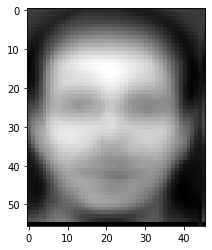

In [241]:
print(factor_project.shape)

pixel_list_number = []
pixel_list_x = []
pixel_list_y = []

for i, j in enumerate(factor_project.tolist()):
    value = (i+1)
    row = value / 46
    column = value % 46 - 1
    pixel_list_number.append(value)
    pixel_list_x.append(row)
    pixel_list_y.append(column)
    

sample = np.zeros(shape=(56, 46))
for i, j in enumerate(pixel_list_x):
    x_value = int(j - 1)
    y_value = int(pixel_list_y[i] - 1)
    sample[x_value, y_value] = factor_project[i]

imgplot = plt.imshow(sample, cmap='gray', vmin=0, vmax=255)
plt.show()